# Overview & Format Data

In [1]:
import pandas as pd 

#Import data

df  = pd.read_csv('train.csv')
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [2]:
# Check each column has null value or not?

df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [3]:
# Check type of data in each column

df.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [4]:
# Check duplicated value in column 'Employee ID '

len(df.iloc[:,0].unique())

22750

From above , There is no duplicated value in column name 'Employee ID ' which means each row is independent

# How are each feature related?

Step 1 : seperate qualitative features and quantitative features

In [5]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [6]:
feat_qual = ['Gender', 'Company Type','WFH Setup Available', 'Designation']
feat_quan = ['Resource Allocation','Mental Fatigue Score', 'Burn Rate']

df_qual = df[feat_qual]
df_quan = df[feat_quan].dropna()

In [7]:
print('Qualitative features dataframe')
print('-'*40)
print(df_qual)
print('#'*100)
print('Quantitative features dataframe')
print('-'*40)
print(df_quan)

Qualitative features dataframe
----------------------------------------
       Gender Company Type WFH Setup Available  Designation
0      Female      Service                  No          2.0
1        Male      Service                 Yes          1.0
2      Female      Product                 Yes          2.0
3        Male      Service                 Yes          1.0
4      Female      Service                  No          3.0
...       ...          ...                 ...          ...
22745  Female      Service                  No          1.0
22746  Female      Product                 Yes          3.0
22747    Male      Service                 Yes          3.0
22748  Female      Service                  No          2.0
22749    Male      Product                  No          3.0

[22750 rows x 4 columns]
####################################################################################################
Quantitative features dataframe
----------------------------------------
       R

Step 2 : focus on qualitative features

In [8]:
df_qual

,Gender,Company Type,WFH Setup Available,Designation
0,Female,Service,No,2.0
1,Male,Service,Yes,1.0
2,Female,Product,Yes,2.0
3,Male,Service,Yes,1.0
4,Female,Service,No,3.0
...,...,...,...,...
22745,Female,Service,No,1.0
22746,Female,Product,Yes,3.0
22747,Male,Service,Yes,3.0
22748,Female,Service,No,2.0


I decide to use criteria below when I find relation between qualitative features 

1.break assumption -> G-test

2.don't break assumption -> Chi-square test

Gender & Company Type
--------------------------------------------------
Has insignificant relation with p-value = 0.14
Statistics test : Chi-square test


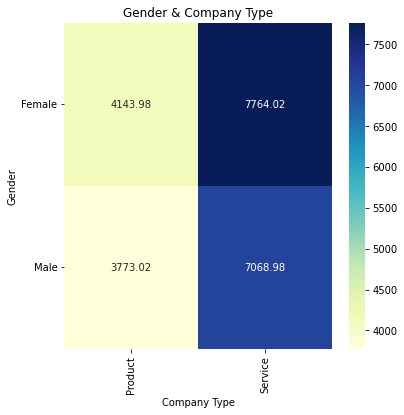

######################################################################################################################################################
Gender & WFH Setup Available
--------------------------------------------------
Has significant relation with p-value = 0.00
Statistics test : Chi-square test


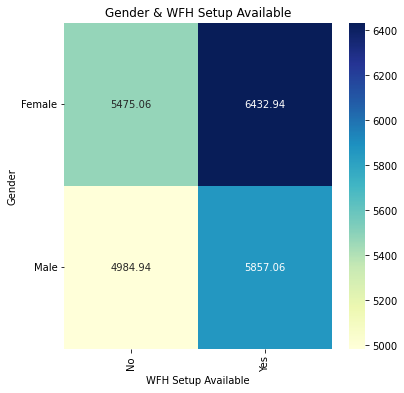

######################################################################################################################################################
Gender & Designation
--------------------------------------------------
Has significant relation with p-value = 0.00
Statistics test : Chi-square test


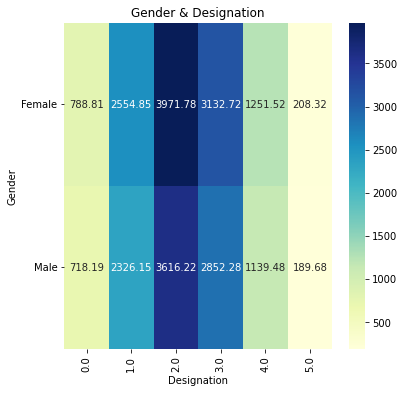

######################################################################################################################################################
Company Type & WFH Setup Available
--------------------------------------------------
Has insignificant relation with p-value = 0.40
Statistics test : Chi-square test


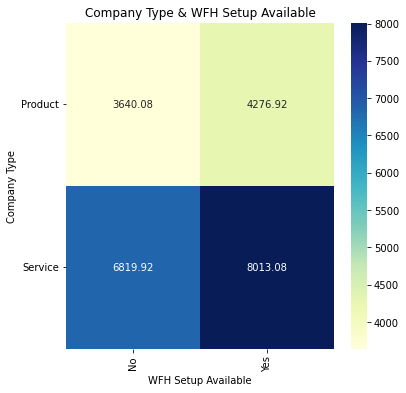

######################################################################################################################################################
Company Type & Designation
--------------------------------------------------
Has insignificant relation with p-value = 0.09
Statistics test : Chi-square test


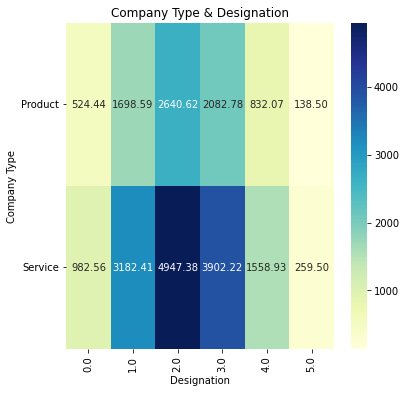

######################################################################################################################################################
WFH Setup Available & Designation
--------------------------------------------------
Has significant relation with p-value = 0.00
Statistics test : Chi-square test


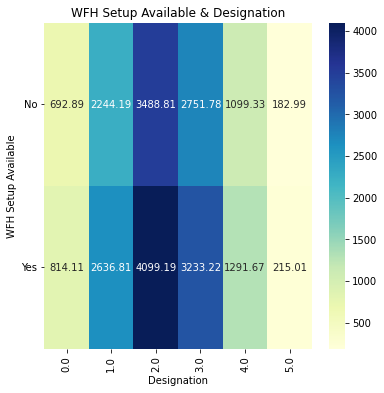

######################################################################################################################################################
pair_insig_qual : 
 ['Gender & Company Type', 'Company Type & WFH Setup Available', 'Company Type & Designation'] 

pair_sig_qual : 
 ['Gender & WFH Setup Available', 'Gender & Designation', 'WFH Setup Available & Designation']


In [9]:
# Check assumption 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from scipy.stats import chi2_contingency

pair_sig_qual = []
pair_insig_qual = []

def check_expected_frequency(observed_frequencies):
    # Calculate the row and column sums
    row_sums = np.sum(observed_frequencies, axis=1)
    col_sums = np.sum(observed_frequencies, axis=0)
    total = np.sum(observed_frequencies)
    
    # Calculate the expected frequencies
    expected_frequencies = np.zeros(observed_frequencies.shape)
    for i in range(observed_frequencies.shape[0]):
        for j in range(observed_frequencies.shape[1]):
            expected_frequencies[i, j] = (row_sums[i] * col_sums[j]) / total

    return expected_frequencies

# Group the data by the two variables and calculate the frequency counts

for i in range(len(df_qual.columns)-1):
    for j in range(i+1,len(df_qual.columns)):
        grouped = df_qual.groupby([df_qual.iloc[:,i], df_qual.iloc[:,j]]).size().reset_index(name="counts")
        contingency_table = grouped.pivot(index=df_qual.columns[i], columns=df_qual.columns[j], values="counts").fillna(0).astype(int)

        # Extract the observed frequencies from the contingency table
        observed_frequencies = contingency_table.values

        # Check the chi-square test assumptions
        expected_frequencies = check_expected_frequency(observed_frequencies)

        name = df_qual.columns[i] + ' & ' + df_qual.columns[j]

        print(name)
        print('-'*50)

        # Check if the expected frequencies are at least minimum_expected_frequency
        if np.min(expected_frequencies) < 5:
            # Use G-test

            g_test, p, dof, expected_frequencies = chi2_contingency(observed_frequencies, lambda_="log-likelihood")

            if p<0.05:
                print('Has significant relation with p-value = {:.2f}'.format(p))
                pair_sig_qual.append(name)

            else:
                print('Has insignificant relation with p-value = {:.2f}'.format(p))
                pair_insig_qual.append(name)
            
            print("Statistics test : G-test")

        else:
            # Use Chi-square test

            chi2, p, dof, expected_frequencies = chi2_contingency(observed_frequencies)

            if p<0.05:
                print('Has significant relation with p-value = {:.2f}'.format(p))
                pair_sig_qual.append(name)

            else:
                print('Has insignificant relation with p-value = {:.2f}'.format(p))
                pair_insig_qual.append(name)

            print("Statistics test : Chi-square test")

            # Create heatmap
            fig, ax = plt.subplots(figsize=(6, 6))
            heatmap = sns.heatmap(expected_frequencies, annot=True, cmap="YlGnBu", fmt=".2f", ax=ax)
            
            # Label the rows and columns
            ax.set_xticklabels(contingency_table.columns, rotation=90)
            ax.set_yticklabels(contingency_table.index, rotation=0)
            ax.set_xlabel(df_qual.columns[j])
            ax.set_ylabel(df_qual.columns[i])
            ax.set_title(name)

            plt.show()

            print('#'*150)

print('pair_insig_qual : \n {} \n'.format(pair_insig_qual))
print('pair_sig_qual : \n {}'.format(pair_sig_qual))

From above , I summarize that 

['Gender & WFH Setup Available', 'Gender & Designation', 'WFH Setup Available & Designation']

has significant relation each other 

Step 3 : focus on quantitative features

I decide to use criteria below when I find relation between quantitative features 

1.Linearity -> pearsonr test

2.Non - linearity -> spearman test

In [10]:
from scipy.stats import pearsonr , spearmanr , linregress

pair_sig_quan = []

for i in range(len(df_quan.columns)-1):
    for j in range(i+1,len(df_quan.columns)):

        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(df_quan.iloc[:,i], df_quan.iloc[:,j])

        name  = df_quan.columns[i] + ' & ' + df_quan.columns[j]

        if p_value < 0.05:
            print("Relationship between {:>30} & {:<30} is linearity with p-value = {}".format(df_quan.columns[i],df_quan.columns[j],p_value))

            # pearsonr test
            r, p = pearsonr(df_quan.iloc[:,i], df_quan.iloc[:,j])

            if p < 0.05:
                print("Relationship between {:>30} & {:<30} has significant relation with pearson = {} and p-value = {}".format(df_quan.columns[i],df_quan.columns[j],r,p))
                pair_sig_quan.append(name)
            
            else:
                print("Relationship between {:>30} & {:<30} has insignificant relation with pearson = {} and p-value = {}".format(df_quan.columns[i],df_quan.columns[j],r,p))

        else:
            print("Relationship between {:>30} & {:<30} is non-linearity with p-value = {}".format(df_quan.columns[i],df_quan.columns[j],p_value))

            # spearman test
            r, p = spearmanr(df_quan.iloc[:,i], df_quan.iloc[:,j])

            if p < 0.05:
                print("Relationship between {:>30} & {:<30} has significant relation with spearmanr = {} and p-value = {}".format(df_quan.columns[i],df_quan.columns[j],r,p))
                pair_sig_quan.append(name)
            
            else:
                print("Relationship between {:>30} & {:<30} has insignificant relation with spearmanr = {} and p-value = {}".format(df_quan.columns[i],df_quan.columns[j],r,p))

        print('-'*150)

unique_values_sig_quan = set()

for pair in pair_sig_quan:
    values = pair.split(" & ")
    unique_values_sig_quan.update(values)

print('unique_values_sig_quan \n{}'.format(list(unique_values_sig_quan)))

Relationship between            Resource Allocation & Mental Fatigue Score           is linearity with p-value = 0.0
Relationship between            Resource Allocation & Mental Fatigue Score           has significant relation with pearson = 0.7995632228418807 and p-value = 0.0
------------------------------------------------------------------------------------------------------------------------------------------------------
Relationship between            Resource Allocation & Burn Rate                      is linearity with p-value = 0.0
Relationship between            Resource Allocation & Burn Rate                      has significant relation with pearson = 0.8550048496676413 and p-value = 0.0
------------------------------------------------------------------------------------------------------------------------------------------------------
Relationship between           Mental Fatigue Score & Burn Rate                      is linearity with p-value = 0.0
Relationship between   

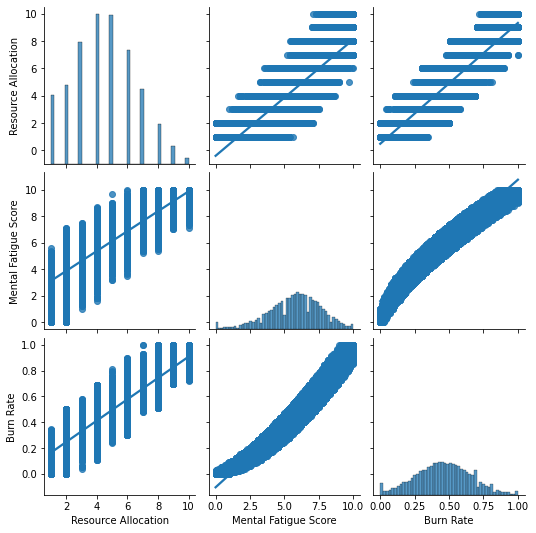

In [11]:
sns.pairplot(df_quan,kind='reg')

<AxesSubplot:>

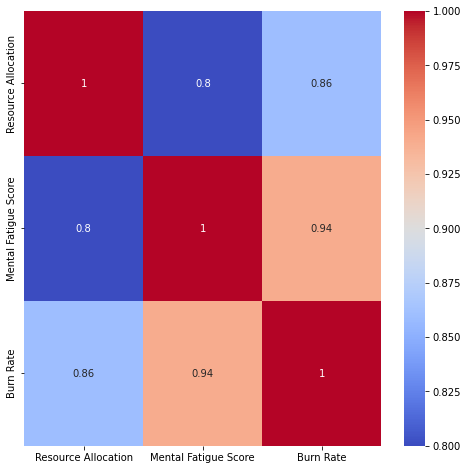

In [12]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(df_quan.corr().round(2), annot=True, cmap='coolwarm')

From above , I summarize that

['Resource Allocation', 'Burn Rate', 'Mental Fatigue Score'] has significant relation each other 

Step 4 : focus on both qualitative and quantitative features

In [13]:
# Check normality

from scipy import stats

pair_normal = []
pair_non_normal = []

df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

feat_qual = ['Gender', 'Company Type','WFH Setup Available', 'Designation']
feat_quan = ['Resource Allocation','Mental Fatigue Score', 'Burn Rate']

df_qual = df[feat_qual]
df_quan = df[feat_quan]

for i in feat_qual:
    for j in feat_quan:
        unique_value = set()
        qual_vs_quan = df[[i,j]]

        for k in range(len(qual_vs_quan)):
            unique_value.add(qual_vs_quan.loc[k,i])

        unique_value = list(unique_value)
        print(unique_value)
        for l in range(len(unique_value)):

            feat_filter = qual_vs_quan[qual_vs_quan[i] == unique_value[l]]

            name = str(i) + ' = ' + str(unique_value[l]) +' & '+ str(j)
            print(name)
            print('len : {}'.format(len(feat_filter[j])))

            if len(feat_filter[j]) > 50:

                statistics , pvalue = stats.kstest(feat_filter[j], 'norm')
                print('len > 50 : use kstest')
                print('p-value : {}\n' .format(pvalue))

                if pvalue < 0.05:
                    print('Non-Normal')
                    pair_non_normal.append(name)

                else:
                    print('normal')
                    pair_normal.append(name)

            else:
                statistics , pvalue = stats.shapiro(feat_filter[j], 'norm')
                print('len <= 50 : use shapiro')
                print('p-value : {}\n' .format(pvalue))
                
                if pvalue < 0.05:
                    print('Non-Normal')
                    pair_non_normal.append(name)

                else:
                    print('normal')
                    pair_normal.append(name)

            print('-'*40)

print('Normal : \n {} \n'.format(pair_normal))
print('Non-normal : \n {}'.format(pair_non_normal))

['Female', 'Male']
Gender = Female & Resource Allocation
len : 9747
len > 50 : use kstest
p-value : 0.0

Non-Normal
----------------------------------------
Gender = Male & Resource Allocation
len : 8843
len > 50 : use kstest
p-value : 0.0

Non-Normal
----------------------------------------
['Female', 'Male']
Gender = Female & Mental Fatigue Score
len : 9747
len > 50 : use kstest
p-value : 0.0

Non-Normal
----------------------------------------
Gender = Male & Mental Fatigue Score
len : 8843
len > 50 : use kstest
p-value : 0.0

Non-Normal
----------------------------------------
['Female', 'Male']
Gender = Female & Burn Rate
len : 9747
len > 50 : use kstest
p-value : 0.0

Non-Normal
----------------------------------------
Gender = Male & Burn Rate
len : 8843
len > 50 : use kstest
p-value : 0.0

Non-Normal
----------------------------------------
['Service', 'Product']
Company Type = Service & Resource Allocation
len : 12174
len > 50 : use kstest
p-value : 0.0

Non-Normal
-----------

From above , I summarize each pair is non-normal so I decide to use wilcoxon rank sum test to check pair by pair

In [14]:
# Check each group has different location or not?

list_dif = []
list_same = []

for i in feat_qual:
    for j in feat_quan:
        unique_value = set()
        qual_vs_quan = df[[i,j]]

        for k in range(len(qual_vs_quan)):
            unique_value.add(qual_vs_quan.loc[k,i])

        unique_value = list(unique_value)

        for l in range(len(unique_value)-1):
            for m in range(l+1,len(unique_value)):

                data_1 = qual_vs_quan[qual_vs_quan[i]==unique_value[l]][j]
                data_2 = qual_vs_quan[qual_vs_quan[i]==unique_value[m]][j]

                statistics , pvalue = stats.ranksums(data_1,data_2)

                name = str(i)+' = '+str(unique_value[l])+' & '+str(j)+' VS '+str(i)+' = '+str(unique_value[m])+' & '+str(j)
                print(name)
                print('p-value : {}'.format(pvalue))

                if pvalue<0.05:
                    print('different')
                    list_dif.append(name)
                else:
                    print('same')
                    list_same.append(name)

                print('-'*40)

print('Diff : \n')
for pair_dif in list_dif:
    print(pair_dif + '\n')

print('#'*100)

print('Same : \n')

for pair_same in list_same:
    print(pair_same + '\n')

Gender = Female & Resource Allocation VS Gender = Male & Resource Allocation
p-value : 9.554016814045996e-86
different
----------------------------------------
Gender = Female & Mental Fatigue Score VS Gender = Male & Mental Fatigue Score
p-value : 1.1253106708142695e-104
different
----------------------------------------
Gender = Female & Burn Rate VS Gender = Male & Burn Rate
p-value : 5.604218510224148e-116
different
----------------------------------------
Company Type = Service & Resource Allocation VS Company Type = Product & Resource Allocation
p-value : 0.4871121082319294
same
----------------------------------------
Company Type = Service & Mental Fatigue Score VS Company Type = Product & Mental Fatigue Score
p-value : 0.6988570791549332
same
----------------------------------------
Company Type = Service & Burn Rate VS Company Type = Product & Burn Rate
p-value : 0.49967713452309004
same
----------------------------------------
WFH Setup Available = No & Resource Allocation V

From above , I get relation of each group between qualitative and quantitative features

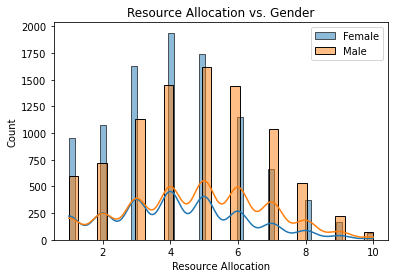

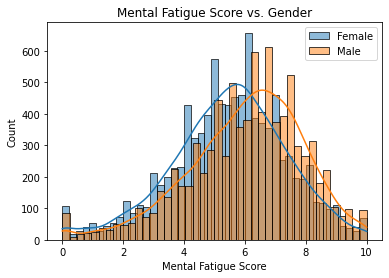

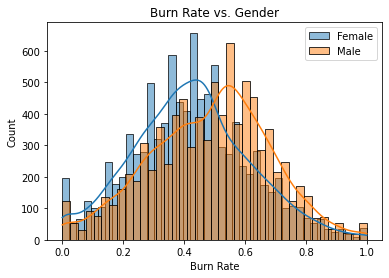

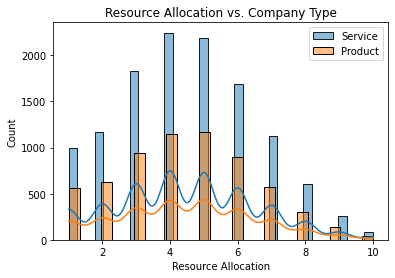

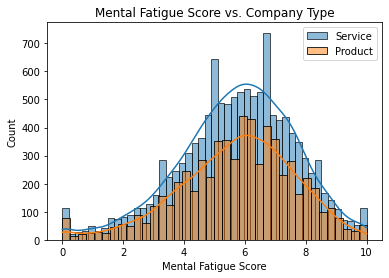

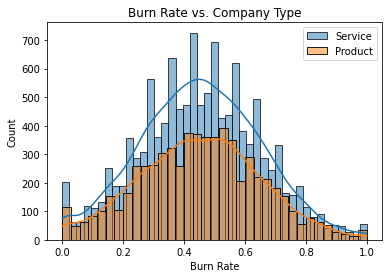

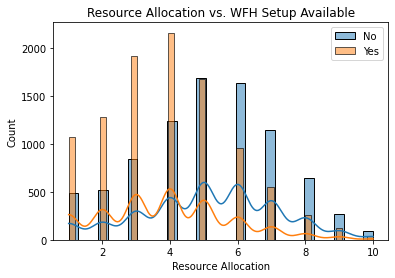

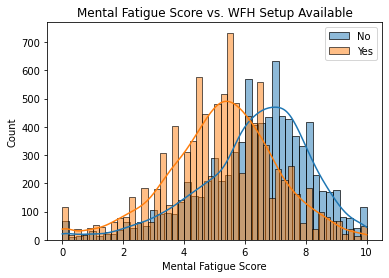

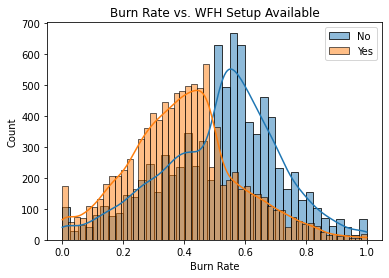

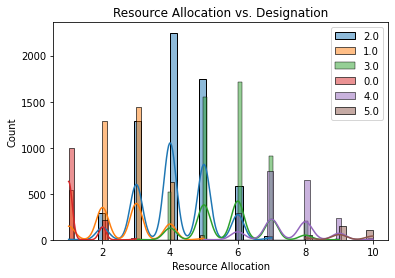

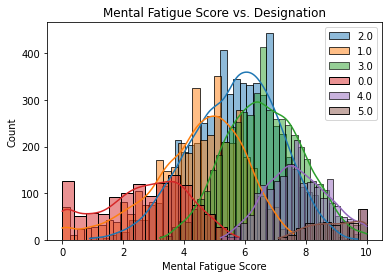

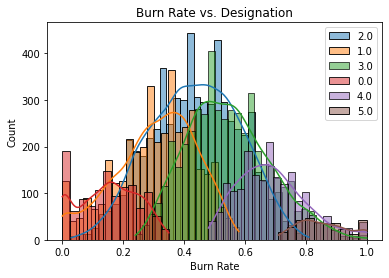

In [15]:
# Loop over both qualitative and quantitative features
for i in feat_qual:
    for j in feat_quan:
        qual_vs_quan = df[[i,j]]

        # Get the unique values of qualitative features
        unique_values = qual_vs_quan[i].unique()

        # Create a figure and axes
        fig, ax = plt.subplots()

        # Loop over the unique values and plot a histogram for each
        for k in range(len(unique_values)):
            value_filter = qual_vs_quan[i] == unique_values[k]
            feat_filter = qual_vs_quan[value_filter][j]

            # Plot a histogram of quantitative feature
            sns.histplot(feat_filter, ax=ax, label=unique_values[k], kde=True , color=sns.color_palette()[k])

        # Add a title and legend
        ax.set_title(f"{j} vs. {i}")
        ax.legend()

        # Show the plot
        plt.show()

# Build appropriate model for burn-out prediction

In [16]:
df  = pd.read_csv('train.csv')
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
3,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
4,fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29
...,...,...,...,...,...,...,...,...,...
18585,fffe3300390030003600,2008-12-15,Female,Product,Yes,1.0,3.0,6.0,0.48
18586,fffe32003500370033003200,2008-05-27,Male,Product,No,3.0,7.0,6.2,0.54
18587,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
18588,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


I remove unused columns 

In [17]:
df = df.drop(['Employee ID','Date of Joining'],axis=1)
df

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2.0,3.0,3.8,0.16
1,Male,Service,Yes,1.0,2.0,5.0,0.36
2,Male,Service,Yes,1.0,1.0,2.6,0.20
3,Female,Service,No,3.0,7.0,6.9,0.52
4,Male,Product,Yes,2.0,4.0,3.6,0.29
...,...,...,...,...,...,...,...
18585,Female,Product,Yes,1.0,3.0,6.0,0.48
18586,Male,Product,No,3.0,7.0,6.2,0.54
18587,Female,Product,Yes,3.0,6.0,6.7,0.59
18588,Female,Service,No,2.0,5.0,5.9,0.52


I choose dummy technique to do one-hot encoding for converting qualitative to quantitative before building model

In [18]:
df = pd.get_dummies(df)
df

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes
0,2.0,3.0,3.8,0.16,1,0,0,1,1,0
1,1.0,2.0,5.0,0.36,0,1,0,1,0,1
2,1.0,1.0,2.6,0.20,0,1,0,1,0,1
3,3.0,7.0,6.9,0.52,1,0,0,1,1,0
4,2.0,4.0,3.6,0.29,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
18585,1.0,3.0,6.0,0.48,1,0,1,0,0,1
18586,3.0,7.0,6.2,0.54,0,1,1,0,1,0
18587,3.0,6.0,6.7,0.59,1,0,1,0,0,1
18588,2.0,5.0,5.9,0.52,1,0,0,1,1,0


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.gaussian_process import GaussianProcessRegressor

from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

from sklearn.preprocessing import MinMaxScaler

X = df.drop('Burn Rate',axis=1)
y = df[['Burn Rate']].values.ravel()

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

# Candidated algorithm models
models = []
models.append(('LR', LinearRegression()))
models.append(('kNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))
models.append(('RFC', RandomForestRegressor(random_state=0)))
models.append(('DT', DecisionTreeRegressor(random_state=0)))
models.append(('GNB', GaussianProcessRegressor()))
models.append(('XGB', XGBRegressor(random_state=0)))

names = []
results = []

for name, model in models:
    scores = cross_val_score(model, X, y, cv=10, scoring='r2')
    names.append(name)
    results.append(scores)
    print('{:4} -> Avg R2 score : {:.3f} % (Std : {:.3f} %)'.format(name, scores.mean()*100, scores.std()*100))

LR   -> Avg R2 score : 92.042 % (Std : 0.306 %)
kNN  -> Avg R2 score : 91.588 % (Std : 0.380 %)
SVR  -> Avg R2 score : 91.381 % (Std : 0.378 %)
RFC  -> Avg R2 score : 91.526 % (Std : 0.426 %)
DT   -> Avg R2 score : 90.585 % (Std : 0.466 %)
GNB  -> Avg R2 score : 92.565 % (Std : 0.363 %)
XGB  -> Avg R2 score : 92.655 % (Std : 0.305 %)


From above , I choose XGboost model because it has maximum Avg R2 score and minimum Std

Next step : Tuning model 

In [20]:
from sklearn.model_selection import GridSearchCV

param_dist = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'gamma': [0, 1, 5]
}

model_grid = XGBRegressor(random_state=0)

grid_search = GridSearchCV(model_grid, param_dist, cv=10, scoring='r2',verbose=1)

grid_search.fit(X, y)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Best parameters:  {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score:  0.9280694649848836


From above , I get the best parameter from gridsearch tuning process 

Next step , I check my best model is overfitting or not?

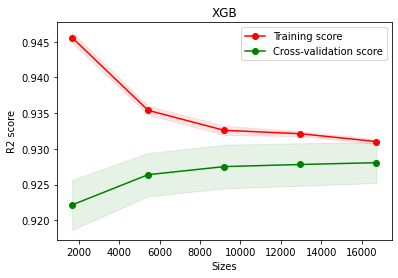

In [21]:
from sklearn.model_selection import learning_curve

scoring = ['r2']

y_label_name = ['R2 score']

xgb =  XGBRegressor(**grid_search.best_params_)

for i in range(1):
    train_sizes, train_scores, test_scores = learning_curve(xgb,
                                                            X, y, cv=10, train_sizes=np.linspace(.1, 1.0, 5),scoring=scoring[i])

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title('XGB')
    plt.ylabel(y_label_name[i])
    plt.xlabel('Sizes')
    plt.legend(loc="best")
    plt.show()

As you can see from graph above , there is no large gap between these two lines from xgb model 

So I choose it as the best model for burn-out prediction

In [22]:
# Save model

import joblib

filename = 'XGB.pkl'
joblib.dump(xgb, filename) 
print(f"Trained xgb model saved to {filename}")

Trained xgb model saved to XGB.pkl


In [23]:
from sklearn.model_selection import train_test_split

filename = 'XGB.pkl'

model_xgb = joblib.load(filename)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
print('y_pred :', y_pred)

r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)

y_pred : [0.6107794  0.65026206 0.4884204  ... 0.23053329 0.31437024 0.01568538]
R-squared: 0.9267109066054677


# Test unseen data from test.csv

In [24]:
df_test  = pd.read_csv('test.csv')
df_test = df_test.drop(['Employee ID','Date of Joining'],axis=1)
df_test = pd.get_dummies(df_test)
X_test = scaler.fit_transform(df_test)
X_test

array([[0.4       , 0.44444444, 0.77      , ..., 1.        , 1.        ,
        0.        ],
       [0.2       , 0.11111111, 0.52      , ..., 0.        , 0.        ,
        1.        ],
       [0.2       , 0.22222222, 0.59      , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.8       , 0.66666667, 0.96      , ..., 1.        , 1.        ,
        0.        ],
       [0.6       , 0.55555556, 0.67      , ..., 1.        , 1.        ,
        0.        ],
       [0.4       , 0.11111111, 0.2       , ..., 0.        , 1.        ,
        0.        ]])

Burn_out
0        0.615851
1        0.355045
2        0.427403
3        0.391362
4        0.534425
           ...   
12245    0.414557
12246    0.436626
12247    0.835200
12248    0.575412
12249    0.122376
Name: Burn_out, Length: 12250, dtype: float32
----------------------------------------
count    12250.000000
mean         0.450128
std          0.189910
min         -0.001218
25%          0.323593
50%          0.444496
75%          0.583991
max          0.978669
Name: Burn_out, dtype: float64


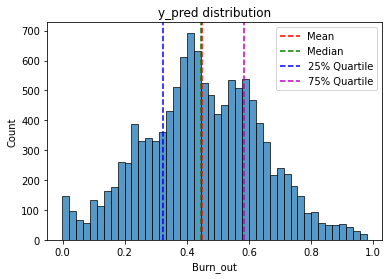

In [25]:
y_pred = model_xgb.predict(X_test)
df_test['Burn_out'] = y_pred
print('Burn_out')
print(df_test['Burn_out'])
print('-'*40)
print(df_test['Burn_out'].describe())

sns.histplot(df_test['Burn_out'])
plt.axvline(df_test['Burn_out'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df_test['Burn_out'].median(), color='g', linestyle='--', label='Median')
plt.axvline(df_test['Burn_out'].quantile(0.25), color='b', linestyle='--', label='25% Quartile')
plt.axvline(df_test['Burn_out'].quantile(0.75), color='m', linestyle='--', label='75% Quartile')
plt.title('y_pred distribution')
plt.legend()
plt.show()

# Feature importance 

In [26]:
# Define the number of runs and random states
n_runs = 1000
random_states = range(n_runs)

# Define a function to train the model and return the feature importances
def train_and_get_feature_importances(X_train, y_train, random_state):
    model_xgb = XGBRegressor(**grid_search.best_params_,random_state=random_state)
    model_xgb.fit(X_train, y_train)
    return model_xgb.feature_importances_

# Loop over the random states and accumulate the feature importances
all_importances = []
for random_state in random_states:
    importances = train_and_get_feature_importances(X_train, y_train, random_state)
    all_importances.append(importances)

# Calculate the mean feature importance across all runs
mean_importances = np.mean(all_importances, axis=0)

# Create a DataFrame to store the mean feature importances
df_importances = pd.DataFrame({'feature': df_test.columns[:-1], 'importance': mean_importances})

# Sort the DataFrame by feature importance in descending order
df_importances_sorted = df_importances.sort_values(by='importance', ascending=False)

# Print the sorted DataFrame
print(df_importances_sorted)

                   feature  importance
2     Mental Fatigue Score    0.585017
1      Resource Allocation    0.296358
0              Designation    0.078604
7   WFH Setup Available_No    0.018455
8  WFH Setup Available_Yes    0.012100
3            Gender_Female    0.004877
4              Gender_Male    0.003129
6     Company Type_Service    0.000739
5     Company Type_Product    0.000721


From above , 

['Mental Fatigue Score' , 'Resource Allocation'] rather affect to burn_out rate 